In [ ]:
""" After looking and searching too long
Now it is time to finally get a nice plot """

In [ ]:
""" first get the correct data (x, y, z) """

In [101]:
# Import necessary packages
import os
import requests
import json
import numpy as np
import pandas as pd

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

import geopandas as gpd
import rioxarray as rxr
from rasterio.mask import mask

%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon

import plotly.graph_objects as go

from typing import Dict 

import seaborn as sns

import earthpy as et

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [102]:
address = "Lange Van Sterbeeckstraat 8, 2060 Antwerpen"

In [103]:
def get_address_data_from_geopunt(address: str):
    data = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
#    print(data,"\n")
    info = {'address' : address, 
                'x_value' : data['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : data['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : data['LocationResult'][0]['Thoroughfarename'],
                'house_number' : data['LocationResult'][0]['Housenumber'], 
                'postcode': data['LocationResult'][0]['Zipcode'], 
                'municipality' : data['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
#    print(info['polygon'][0]['coordinates'][0])
#    print(info['polygon'][1]['coordinates'][1])
    
    
    return info

In [104]:
address_info = get_address_data_from_geopunt(address)
address_info

{'address': 'Lange Van Sterbeeckstraat 8, 2060 Antwerpen',
 'x_value': 153908.9,
 'y_value': 212660.38,
 'street': 'Lange Van Sterbeeckstraat',
 'house_number': '8',
 'postcode': '2060',
 'municipality': 'Antwerpen',
 'polygon': [{'coordinates': [[[153913.09697395563, 212652.07560559362],
     [153909.20398195833, 212669.40699760243],
     [153904.5820299536, 212668.39899760485],
     [153907.5011979565, 212656.54043759406],
     [153908.57345395535, 212652.1845335923],
     [153908.816653952, 212651.1965655908],
     [153909.12673395127, 212651.2602455914],
     [153913.09697395563, 212652.07560559362]]],
   'type': 'Polygon'}]}

In [105]:

# get the polygon coordinates in a x and a y list
poly = address_info["polygon"]
coords = poly[0]["coordinates"]

x_arr = []
y_arr = []

for i in range(len(coords)):
    lst = coords[i]

for j in range(len(lst)):
    x_arr.append(lst[j][0])
    y_arr.append(lst[j][1])

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

print("x: ", x_arr)
print("y: ", y_arr)  

x:  [153913.09697396 153909.20398196 153904.58202995 153907.50119796
 153908.57345396 153908.81665395 153909.12673395 153913.09697396]
y:  [212652.07560559 212669.4069976  212668.3989976  212656.54043759
 212652.18453359 212651.19656559 212651.26024559 212652.07560559]


In [106]:
# get the max and min coordinates from the polygon for 
# in order to calculate the relative coordinates for the box
xLeft = int(x_arr.min())
yBottom = int(y_arr.min())
xRight = int(x_arr.max())
yTop = int(y_arr.max())
print(xLeft, yBottom, xRight, yTop)

153904 212651 153913 212669


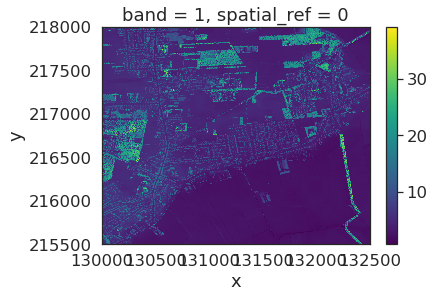

In [107]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 0:2500, 0:2500]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

In [108]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dsm_pre_arr.rio.crs)
print("The spatial extent is:", dsm_pre_arr.rio.bounds())


The CRS for this data is: EPSG:31370
The spatial extent is: (130000.0, 198000.0, 162000.0, 218000.0)


In [109]:
print("The no data value is:", dsm_pre_arr.rio.nodata)

The no data value is: -9999.0


In [111]:
# create an for the address cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, xLeft:xRight, yBottom:yTop]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

TypeError: object of type 'int' has no len()

In [ ]:
# calculate the relative coordinates
# To do so:
# 1. get actual pixelwise length and width of tif file
a_length, a_width = 
# 2. get relative to coordinates length and width of that tif file
# 3. divide the xLeft by 2. and multiplie by 1.
# 4. do the same for yBottom, xRight and yTop
xL = xLeft / 



In [22]:
""" position a slice on the map to reduce data """

' position a slice on the map to reduce data '

In [ ]:
""" make a function to search the right file """